In [1]:
!pip install yfinance 
!pip install talib-binary

     |████████████████████████████████| 63 kB 899 kB/s 
     |████████████████████████████████| 6.4 MB 11.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 2.4 MB 5.0 MB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf
import talib as ta

In [3]:
# define the variable parameters
ticker = 'MU'
start_date = '2019-01-01'
end_date = '2022-3-18'

In [4]:
# Fetch the adjusted price data
# auto_adjust: Set this to True to download the adjusted price. By default, it is False.

data = yf.download(ticker, start_date, end_date, auto_adjust=True)

# Display the data
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,30.923757,32.998643,30.674372,32.669453,26004300
2019-01-03,31.741741,32.070931,30.784102,30.923758,29145500
2019-01-04,31.582132,32.958739,31.472402,32.619576,28557300
2019-01-07,33.617117,34.365272,33.228076,33.916378,44841500
2019-01-08,34.465026,34.504929,32.729308,33.657021,33434100


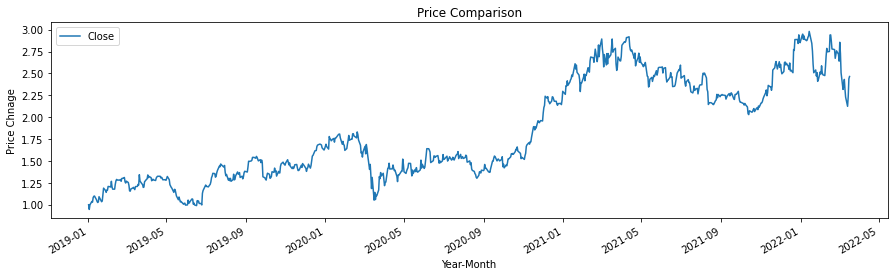

In [5]:
# Plot the absolute price series
plt.figure(figsize=(15,4))
(data['Close']/data['Close'].iloc[0]).plot()

# Set the title and axes label
plt.title('Price Comparison', fontsize=12)
plt.xlabel('Year-Month', fontsize=10)
plt.ylabel('Price Chnage', fontsize=10)
plt.legend()
plt.show()

**MACD Indicator - Entry Price**

In [6]:
# Calculate the MACD line, signal line and MACD histogram
data['macd_line'], \
data['macd_signal_line'], \
data['macd_hist'] = ta.MACD(data['Close'])

# Drop the NaN values
data.dropna(inplace=True)

Entry Signals

In [7]:
# Generate buy signals
# Use 1 for buy and 0 for no action
data['macd_signal'] = np.where(data['macd_line'] > data['macd_signal_line'], 1, 0)

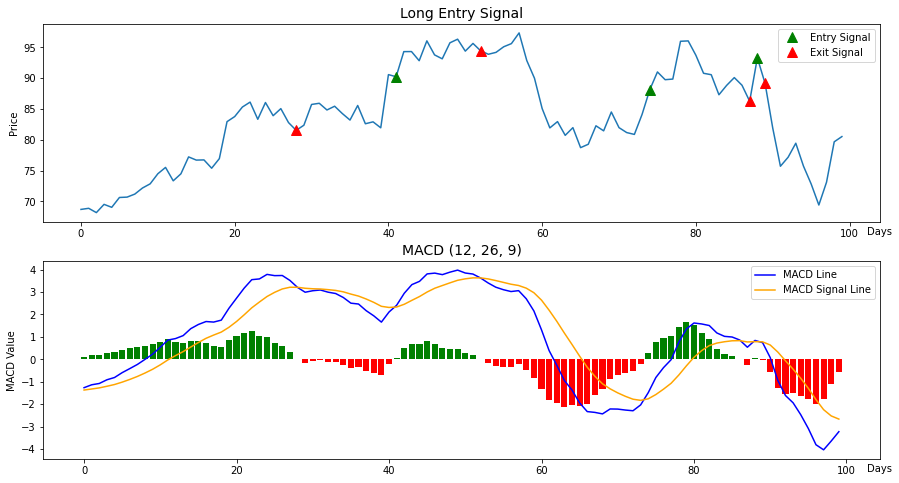

In [14]:
# Show the last 100 points for illustration purposes
data_for_plot = data[-100:]
num_of_x_values = data_for_plot['Close'].shape[0]

# Define the plot figure
fig = plt.figure(figsize=(15, 8))

# Sub plot for the close price and entry signal
ax1 = fig.add_subplot(211)

# Set the title and axis labels
ax1.set_title('Long Entry Signal', fontsize=14)
ax1.set_xlabel('Days', fontsize=10)
ax1.xaxis.set_label_coords(1, -0.025) # set xlabel to end of graph
ax1.set_ylabel('Price', fontsize=10)

# Plot close price
ax1.plot(range(num_of_x_values), data_for_plot['Close'])

# Plot long entry points
entry_condition_to_plot = np.where((data_for_plot['macd_signal'] == 1) &
                                   (data_for_plot['macd_signal'].shift(1) == 0),
                                   data_for_plot['Close'], np.nan)

ax1.plot(range(num_of_x_values), entry_condition_to_plot, '^',
         ms=10, label='Entry Signal', color='green')
ax1.legend()

# Plot exit points
entry_condition_to_plot = np.where((data_for_plot['macd_signal'] == 0) &
                                   (data_for_plot['macd_signal'].shift(1) == 1),
                                   data_for_plot['Close'], np.nan)

ax1.plot(range(num_of_x_values), entry_condition_to_plot, '^',
         ms=10, label='Exit Signal', color='red')
ax1.legend()

# Sub plot for the MACD line, signal line and MACD histogram
ax2 = fig.add_subplot(212)
ax2.set_title(('MACD (12, 26, 9)'), fontsize=14)
ax2.set_xlabel('Days', fontsize=10)
ax2.xaxis.set_label_coords(1, -0.025)
ax2.set_ylabel('MACD Value', fontsize=10)

# Plot the MACD line and signal line
ax2.plot(range(num_of_x_values),
         data_for_plot['macd_line'], label='MACD Line', color='blue')
ax2.plot(range(num_of_x_values), data_for_plot['macd_signal_line'],
         label='MACD Signal Line', color='orange')

# Colour of the MACD histogram
macd_hist_colour = ['green' if (
    x > 0) else 'red' for x in data_for_plot.macd_hist]

# Plot MACD histogram
ax2.bar(range(num_of_x_values), data_for_plot['macd_hist'], color=macd_hist_colour)
ax2.legend()

plt.show()